# Projeto final - Técnicas de programação II

- Hallynny Henrique Barros
- João Vítor Dias Ferraz
- Samira Vidal de Lima

<img src="estudantes.jpg">

# <font color=black>1. CONHECENDO E MANIPULANDO OS DADOS</font>
***

Este projeto relata a aplicação de técnicas de análises de dados para a comparação do desempenho  dos  alunos  na disciplina de   Matemática.  O experimento utiliza dados reais de duas escolas portuguesas do ensino médio relativos às variáveis relacionadas com  o  sucesso  escolar  que depende,  em  larga  escala,  de  diferentes  fatores  associados  às caraterísticas demográficas e sociais, as quais foram tomadas como a base do presente estudo.

## Dataset - Student Performance Dataset.
Fonte: https://www.kaggle.com/datasets/devansodariya/student-performance-data


## Descrição geral do problema

Investigar e analisar fatores que afetam os estudantes na performance acadêmica

## Varíaveis utilizadas


Variável  | Descrição
:----- | :-----
sex   | 'F' -feminino ou  'M' –masculino
age   | Idade do estudante
address   | 'U' -urbano ou 'R' –rural
famsize   | 'LE3' -menor ou igual a 3 menbros ou 'GT3' -maior que 3 membros
Medu   |  0 -nenhuma, 1 -educação primária (4ª série), 2 -5ª a 9ª série, 3 -educação secundária ou 4 -educação superior
Fedu   |  0 -nenhuma, 1 -educação primária (4ª série), 2 -5ª a 9ª série, 3 -educação secundária ou 4 -educação superior
traveltime   |  1 -<15 min., 2 -15 a 30 min., 3 -30 min. A 1 hora ou 4 -> 1 hora
studytime | 1 -<2 horas, 2 -2 a 5 horas, 3 -5 a 10 horas, ou 4 -> 10 horas)
failures | número de reprovações
absences | número de faltas
G1 | nota do primeiro período: de 0 a 20
G2 | nota do segundo período: de 0 a 20
G3 | nota do terceiro período: de 0 a 20  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import random

In [2]:
df_edu = pd.read_csv('student_data.csv')
df_edu.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df_edu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Criando a váriavel média e selecionando as colunas à serem utilizadas

Das 33 váriaveis presentes no dataset, selecionamos 13 das quais consideramos serem mais relevantes.

In [5]:
df_edu['media'] = (df_edu['G1']+df_edu['G2']+df_edu['G3'])/3
df_edu = df_edu.loc[:, ['sex','age', 'address','famsize','Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'absences','G1','G2','G3', 'media']]
df_edu.head()


,sex,age,address,famsize,Medu,Fedu,traveltime,studytime,failures,absences,G1,G2,G3,media
0,F,18,U,GT3,4,4,2,2,0,6,5,6,6,5.666667
1,F,17,U,GT3,1,1,1,2,0,4,5,5,6,5.333333
2,F,15,U,LE3,1,1,1,2,3,10,7,8,10,8.333333
3,F,15,U,GT3,4,2,1,3,0,2,15,14,15,14.666667
4,F,16,U,GT3,3,3,1,2,0,4,6,10,10,8.666667


# 2. VISUALIZAÇÃO DOS DADOS
***

## CRIANDO UMA FUNÇÃO PARA SELECIONAR AS CORES AUTOMATICAMENTE NOS GRÁFICOS

### Paleta utilizada

In [6]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [7]:
def sample(n):
    colors = sns.color_palette("pastel").as_hex()
    nossa_lista = []
    for i in range(n):
        aleatorio = random.randint(0, len(colors)-1)
        nossa_lista.append(colors[aleatorio])
        colors.remove(colors[aleatorio])     
    return nossa_lista

## 2.1 Conhecendo o perfil dos alunos analisados 

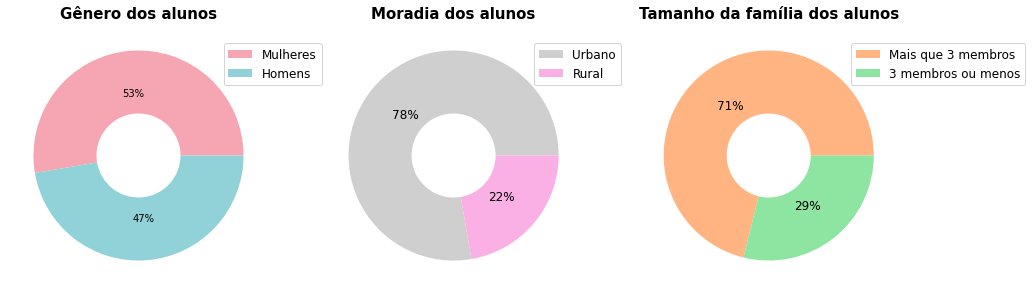

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))


df_edu.value_counts('sex').plot(kind='pie', ax=ax[0], radius=1, wedgeprops={
    "width": 0.6}, autopct='%1.0f%%', figsize=(16, 8), colors=['#f6a6b2', '#90d2d8'], labeldistance=None)
ax[0].set_title('Gênero dos alunos', color='black', fontsize=15,fontweight = 'bold')
ax[0].legend(['Mulheres', 'Homens'], loc='upper right',
             fontsize=12, bbox_to_anchor=(1.22, .95))
ax[0].set_ylabel("")


df_edu['address'].value_counts().plot(kind='pie', fontsize=12, autopct='%1.0f%%', radius=1, wedgeprops={
    "width": 0.6}, figsize=(16, 8), colors=sample(2), labeldistance=None, ax=ax[1])
ax[1].set_title('Moradia dos alunos',
                color='black', fontsize=15,fontweight = 'bold')
ax[1].legend(['Urbano', 'Rural'], loc='upper right',
             fontsize=12, bbox_to_anchor=(1.16, 0.95))
ax[1].set_ylabel("")

df_edu['famsize'].value_counts().plot(kind='pie', fontsize=12, autopct='%1.0f%%', radius=1, wedgeprops={
    "width": 0.6}, figsize=(16, 8), colors=sample(2), labeldistance=None, ax=ax[2])
ax[2].set_title('Tamanho da família dos alunos', color='black', fontsize=15,fontweight = 'bold')
ax[2].legend(['Mais que 3 membros', '3 membros ou menos'],
             loc='upper right', fontsize=12, bbox_to_anchor=(1.50, 0.95))
ax[2].set_ylabel("");


### Verificamos que a maioria dos alunos analisados moram na zona urbana e possuem uma família com mais de 3 membros.

## 2.2 Explorando a distribuição das idades dos alunos

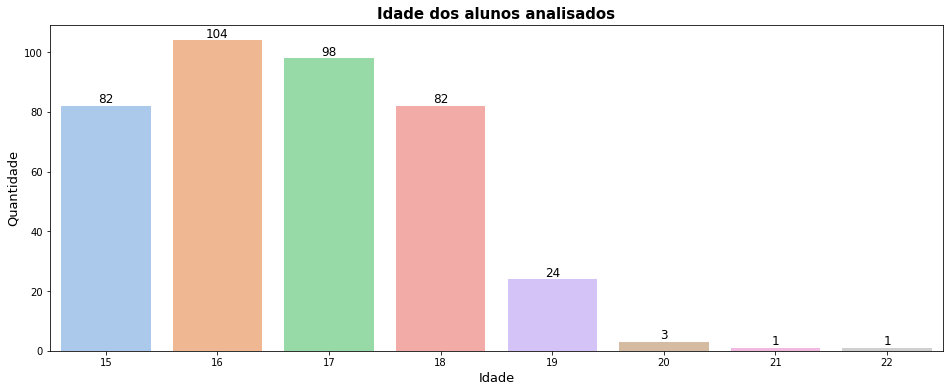

In [9]:
plt.figure(figsize=(16, 6))
age = sns.countplot(data=df_edu, x='age', palette='pastel')
age.bar_label(age.containers[0], fontsize=12)
age.set_xlabel('Idade', fontsize=13)
age.set_ylabel('Quantidade', fontsize=13)
age.set_title('Idade dos alunos analisados', fontsize=15,fontweight = 'bold');


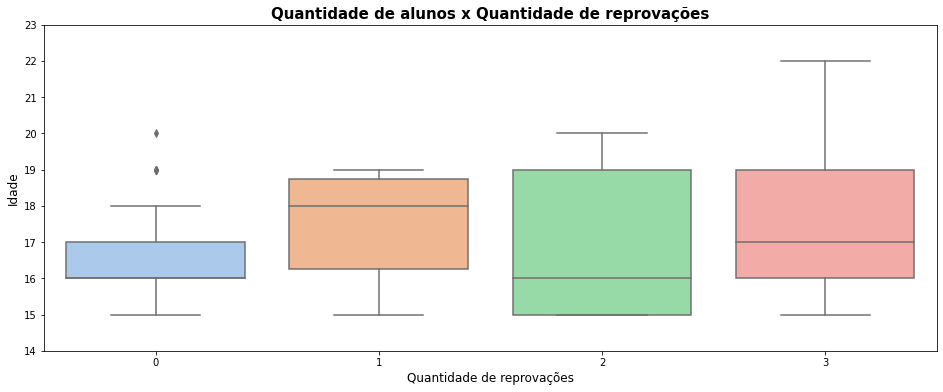

In [10]:
data = pd.concat([df_edu['age'], df_edu['failures']], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x="failures", y="age", data=data, palette='pastel')
fig.axis(ymin=14, ymax=23)
fig.set_title('Quantidade de alunos x Quantidade de reprovações', fontsize=15,fontweight = 'bold')
fig.set_ylabel('Idade', fontsize=12)
fig.set_xlabel('Quantidade de reprovações', fontsize=12);


### As idades dos alunos ficam entre 15 e 22 anos, o que faz sentido devido a pesquisa ser feita com alunos do ensino médio, com o box plot comprovamos que os alunos com maior idade tendem a ser alunos que reprovaram alguma vez.

## 2.3 Explorando as notas.

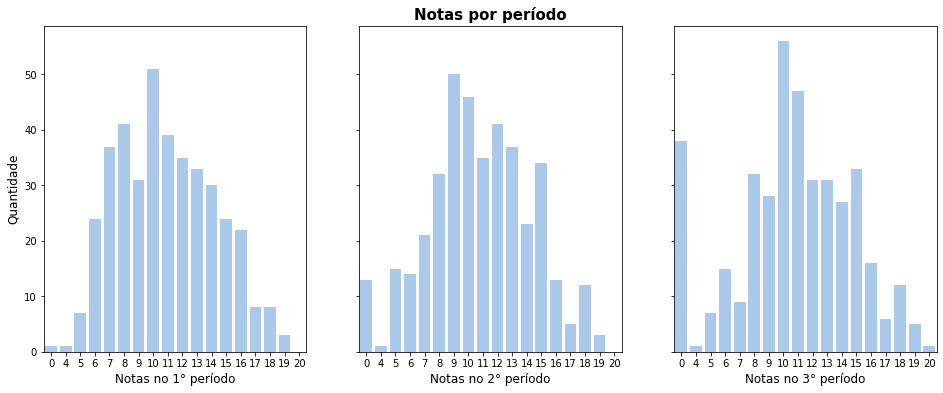

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True, sharex=True)
cor_escolhida = sample(1)
sns.countplot(data=df_edu, x='G1', ax=ax[0], color=cor_escolhida[0])
sns.countplot(data=df_edu, x='G2', ax=ax[1], color=cor_escolhida[0])
sns.countplot(data=df_edu, x='G3', ax=ax[2], color=cor_escolhida[0])
ax[1].set_title('Notas por período', fontsize=15,fontweight = 'bold')
ax[0].set_xlabel('Notas no 1° período', fontsize=12)
ax[1].set_xlabel('Notas no 2° período', fontsize=12)
ax[2].set_xlabel('Notas no 3° período', fontsize=12)
ax[0].set_ylabel('Quantidade', fontsize=12)
ax[1].set_ylabel('')
ax[2].set_ylabel('');


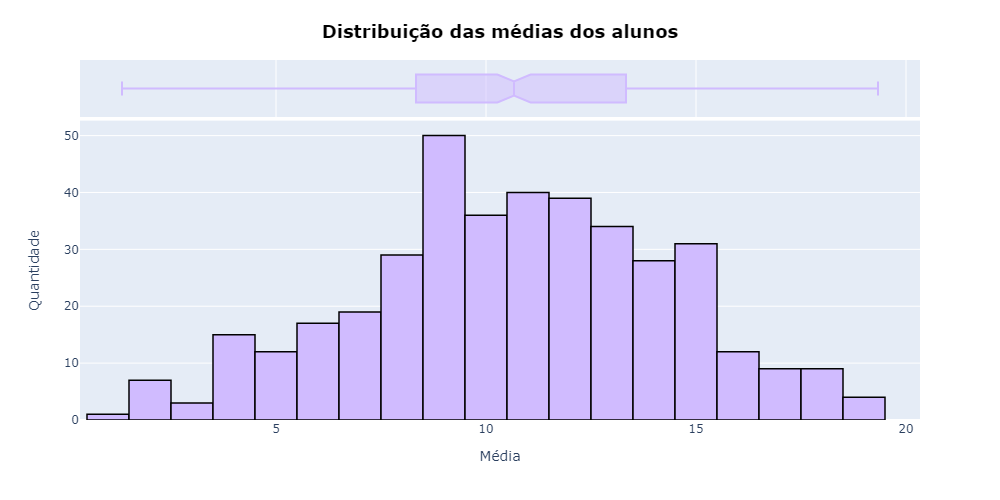

In [12]:
fig = px.histogram(df_edu,'media',marginal='box')
fig.update_layout(
    xaxis_title='Média',
    yaxis_title="Quantidade",
    showlegend=False,
    legend_title="",
    width=1000,
    height=500,
    titlefont={'size': 18},
    title={
        'text': '<b>Distribuição das médias dos alunos<b>',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    })
fig.update_traces(marker_color=sample(1)[0], marker_line_color='black',
                  marker_line_width=1.5)
fig.show("png")

## 2.4 Verificando a correlação entre as variáveis

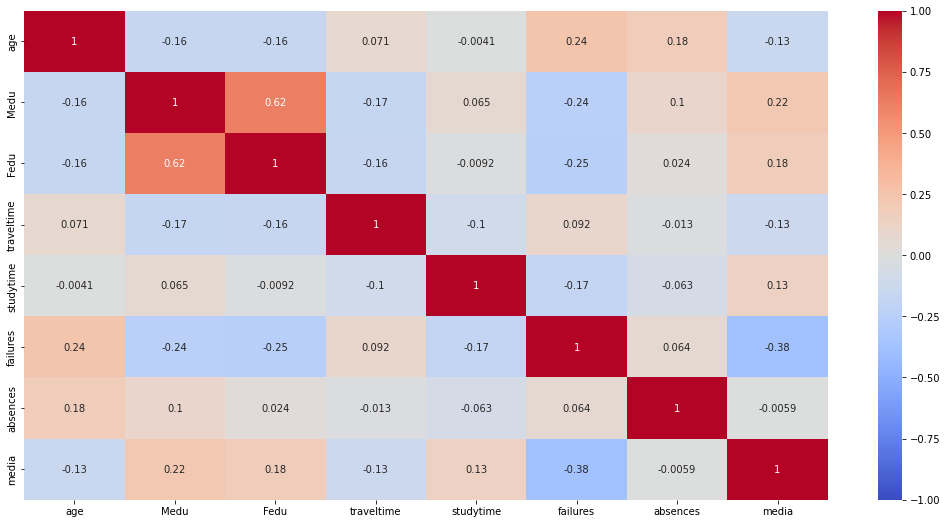

In [13]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_edu.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'absences', 'media']].corr(), cmap='coolwarm', vmin=-1, annot=True);



### - Verificamos que as variáveis que mais afetam positivamente a média do aluno são: educação da mãe e do pai e o tempo de estudo.
### - Já as variáveis de alunos que repetem e tempo de deslocamento tendem a afetar negativamente a média do aluno.

## 2.5 Verificando a relação entre a escolaridade dos pais e a média dos alunos.

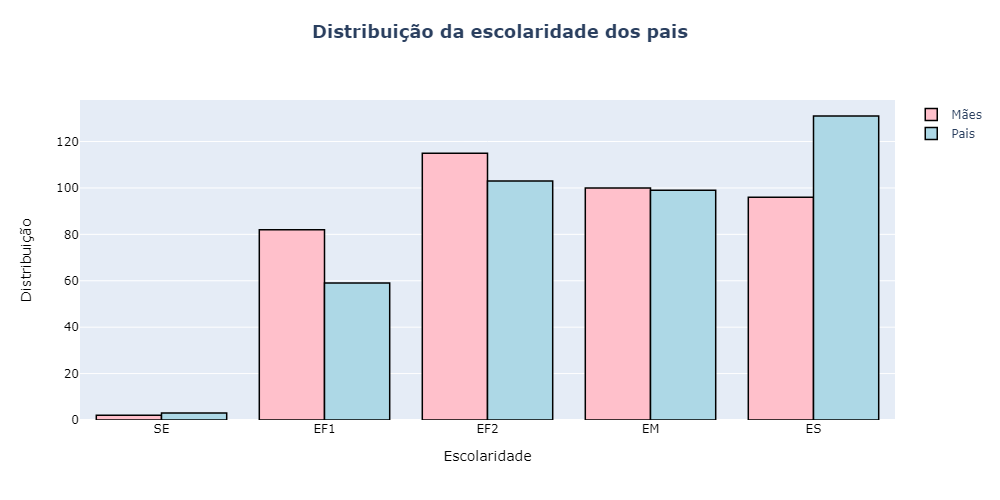

In [21]:
pais = pd.concat([df_edu.value_counts('Medu'),
                 df_edu.value_counts('Fedu')], axis=1).sort_index()
Mulheres = go.Bar(x=['SE', 'EF1', 'EF2', 'EM', 'ES'],
                  y=pais[1],
                  name='Mães',
                  marker_color='pink',
                  marker_line_color='black',
                  marker_line_width=1.5)
Pais = go.Bar(x=['SE', 'EF1', 'EF2', 'EM', 'ES'],
              y=pais[0],
              name='Pais',
              marker_color='lightblue',
              marker_line_color='black',
              marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(
    title={
        'text': '<b>Distribuição da escolaridade dos pais<b>',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    },
    width=1000,
    height=500,
    titlefont={'size': 18},
    yaxis={'title': 'Distribuição','color' :'black'},
    xaxis={'title': 'Escolaridade','color' :'black'},
    title_x=0.5)
fig = go.Figure(data=data, layout=layout)
fig.show('png')


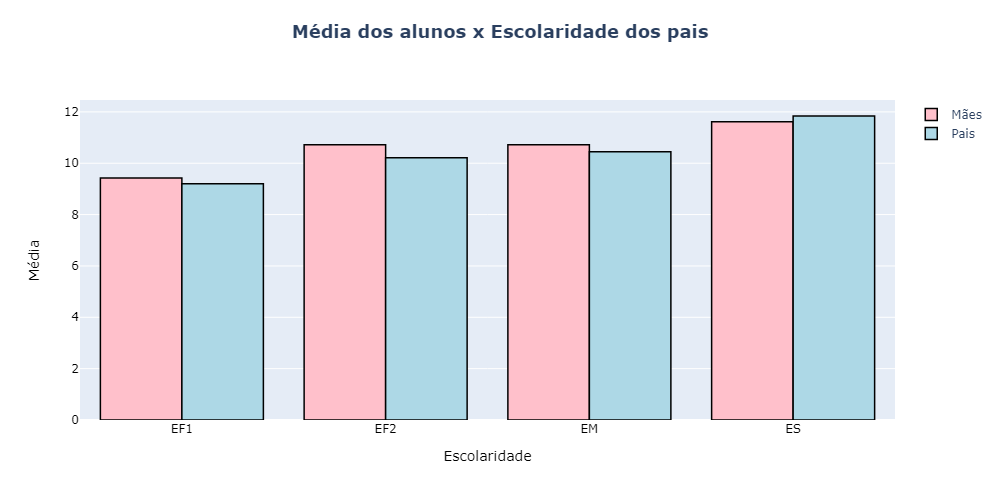

In [22]:
médias_pais = pd.concat([df_edu.groupby(by='Medu').mean(
)['media'], df_edu.groupby(by='Fedu').mean()['media']], axis=1)
médias_pais.columns = ['Pai', 'Mãe']
Mulheres = go.Bar(x=['EF1', 'EF2', 'EM', 'ES'],
                  y=médias_pais['Mãe'][1:],
                  name='Mães',
                  marker_color='pink',
                  marker_line_color='black',
                  marker_line_width=1.5)
Pais = go.Bar(x=['EF1', 'EF2', 'EM', 'ES'],
              y=médias_pais['Pai'][1:],
              name='Pais',
              marker_color='lightblue',
              marker_line_color='black',
              marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(
    title={
        'text': '<b>Média dos alunos x Escolaridade dos pais<b>',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    },
    width=1000,
    height=500,
    titlefont={'size': 18},
    yaxis={'title': 'Média','color' :'black'},
    xaxis={'title': 'Escolaridade','color' :'black'},
    title_x=0.5)
fig = go.Figure(data=data, layout=layout)
fig.show('png')


## 2.6 Verificando a relação entre o tempo de viagem e a média dos alunos.

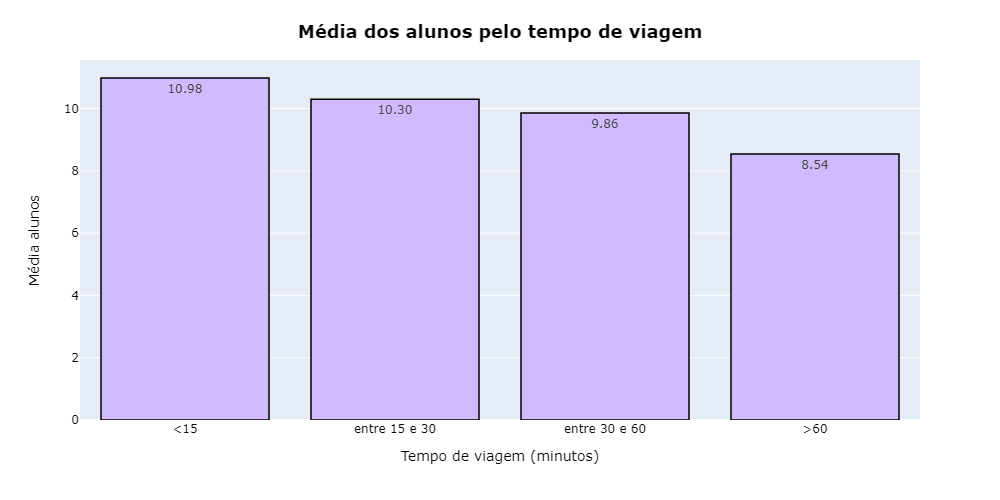

In [23]:
df_tempo = df_edu.groupby(by='traveltime').mean()['media']
df_tempo.index = ['<15', 'entre 15 e 30', 'entre 30 e 60', '>60']
fig = px.bar(df_tempo, text_auto='.2f')
fig.update_layout(
    xaxis_title='Tempo de viagem (minutos)',
    yaxis_title="Média alunos",
    showlegend=False,
    legend_title="",
    width=1000,
    height=500,
    xaxis = {'color' :'black'},    
    yaxis = {'color' :'black'},
    titlefont={'size': 18},
    title={
        'text': '<b>Média dos alunos pelo tempo de viagem<b>',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    })
fig.update_traces(marker_color=sample(1)[0], marker_line_color='black',
                  marker_line_width=1.5)
fig.show('png')

## 2.7 Verificando a relação entre a quantidade de reprovações e a média dos alunos.

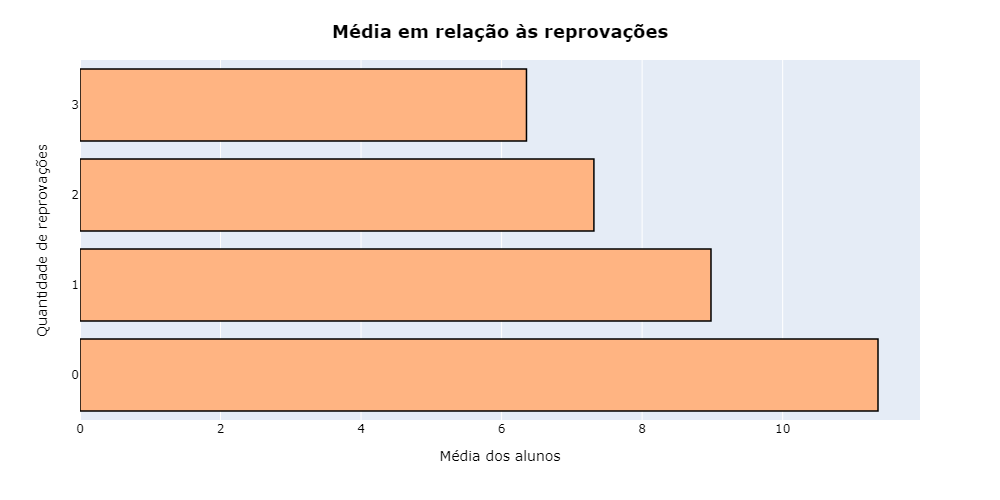

In [30]:
df_media_reprovados = df_edu.groupby(by='failures').mean()['media']
fig = px.bar(df_media_reprovados, orientation='h')
fig.update_layout(
    yaxis_title="Quantidade de reprovações",
    xaxis_title='Média dos alunos',
    titlefont={'size': 18},
    width=1000,
    height=500,
    xaxis = {'color' :'black'},    
    yaxis = {'color' :'black'},
    legend_title="",
    showlegend=False,
    title={
        'text': '<b>Média em relação às reprovações<b>',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    })
fig.update_yaxes(tickvals=[0, 1, 2, 3])
fig.update_traces(marker_color=sample(1)[0], marker_line_color='black',
                  marker_line_width=1.5)
fig.show('png')

## 2.8 Analisando a quantidade de faltas dos alunos nos 3 períodos

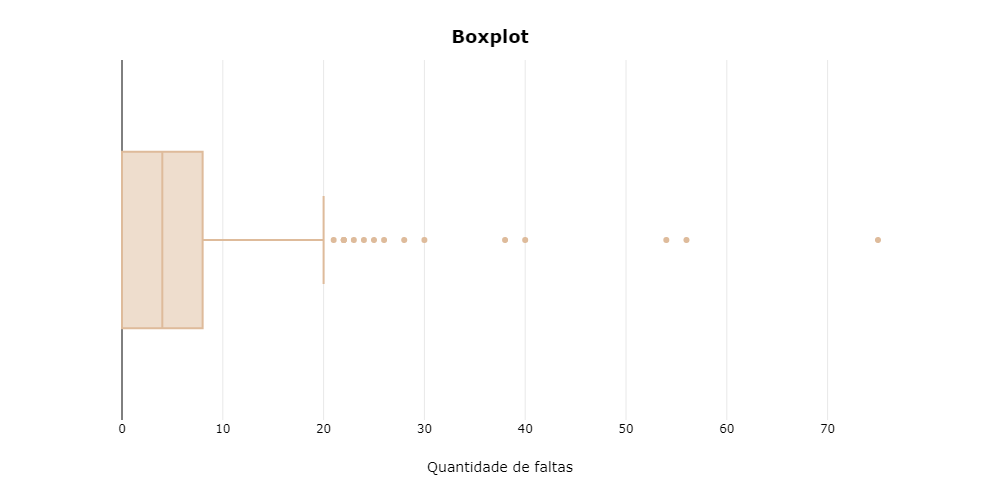

In [31]:
fig = px.box(data_frame=df_edu, x='absences')
fig.update_layout(
    xaxis_title={ 
        'text':'Quantidade de faltas',
        'font_color': 'black'
    },        
    titlefont={'size': 18},
    width=1000,
    height=500,
    xaxis = {'color' :'black'},
    title={
        'text': '<b>Boxplot<b>',
        'x': 0.49,
        'y': 0.94,
        'font_color': 'black'
    },    
    template='none'
)
fig.update_traces(marker_color=sample(1)[0])
fig.show('png')


## 2.9 Comparando o desempenho entre os gêneros

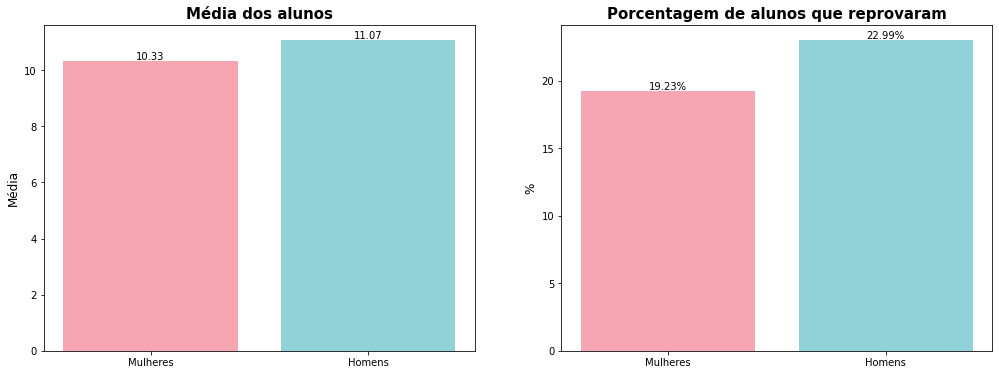

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

df_medias = df_edu.groupby(by='sex').mean()['media']
df_medias.index = ["Mulheres", "Homens"]
ax[0].bar(df_medias.index, df_medias, color=['#f6a6b2', '#90d2d8'])

df_reprovados = df_edu[df_edu['failures'] > 0].groupby(
    'sex').count()['media']/df_edu.value_counts('sex')*100
df_reprovados.index = ['Mulheres', 'Homens']
ax[1].bar(df_reprovados.index, df_reprovados, color=['#f6a6b2', '#90d2d8'])

ax[0].set_title('Média dos alunos', fontsize=15, color='black',fontweight = 'bold')
ax[1].set_title('Porcentagem de alunos que reprovaram',
                fontsize=15, color='black',fontweight = 'bold')
ax[0].set_ylabel('Média', fontsize=12, color='black')
ax[1].set_ylabel('%', fontsize=12, color='black')
ax[0].bar_label(ax[0].containers[0], fmt='%.2f')
ax[1].bar_label(ax[1].containers[0], fmt='%.2f%%');


# 3. CONSIDERAÇÕES FINAIS
***

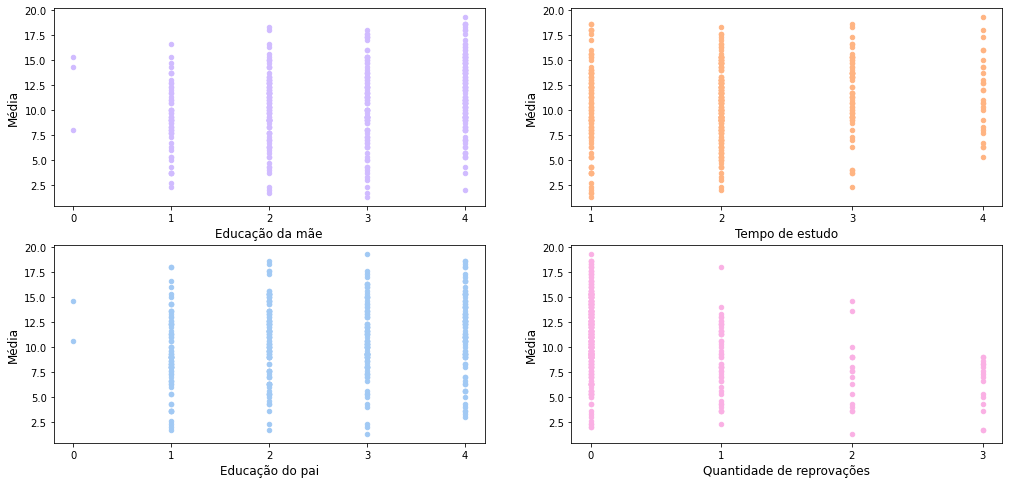

In [20]:
cores = sample(4)

fig, ax = plt.subplots(2, 2, figsize=(17, 8))
df_edu.plot(x='Medu', y='media', kind='scatter', ax=ax[0, 0], color=cores[0])
df_edu.plot(x='studytime', y='media', kind='scatter',
            ax=ax[0, 1], color=cores[1])
df_edu.plot(x='Fedu', y='media', kind='scatter', ax=ax[1, 0], color=cores[2])
df_edu.plot(x='failures', y='media', kind='scatter',
            ax=ax[1, 1], color=cores[3])
ax[0,0].set_xlabel('Educação da mãe',fontsize=12)
ax[1,0].set_xlabel('Educação do pai',fontsize=12)
ax[0,1].set_xlabel('Tempo de estudo',fontsize=12)
ax[1,1].set_xlabel('Quantidade de reprovações',fontsize=12)
ax[0,0].set_ylabel('Média',fontsize=12)
ax[1,0].set_ylabel('Média',fontsize=12)
ax[0,1].set_ylabel('Média',fontsize=12)
ax[1,1].set_ylabel('Média',fontsize=12)
ax[0,0].set_xticks([0,1,2,3,4])
ax[1,0].set_xticks([0,1,2,3,4])
ax[0,1].set_xticks([1,2,3,4])
ax[1,1].set_xticks([0,1,2,3]);

### Conforme mostrado anteriormente, foi enfatizado nos gráficos acima, que as variáveis de educação dos pais, tempo de estudo e quantidade de reprovações influenciam diretamente nas médias dos alunos.

### Isso nos mostra que quanto mais formos dedicados aos estudos melhor será nosso desempenho e aprendizado.